### DSC 478 - Programming Machine Learning A
### Team Project: Code Sages


### June 9, 2024

### Dataset: Anime Recommendations Database

#### https://www.kaggle.com/code/hasibalmuzdadid/anime-ratings-analysis-recommender-system/input

### Item-based Recommender System performed by: Ken Vellian
### Instructions on how to run this Notebook below

In [36]:
# Import statements up to Week 9

# Numerical Operations and Data Manipulation 
import pandas as pd
import numpy as np
import numpy.linalg as la
from collections import Counter
import math
import random
 
# Linear Algebra and Matrix Operations
from scipy.sparse import csr_matrix
from scipy.linalg import svd
from scipy.sparse.linalg import svds

# Data Preprocessing and Machine Learning 
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import silhouette_samples, confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, completeness_score, homogeneity_score
from sklearn.feature_extraction import DictVectorizer, text
from sklearn import preprocessing, model_selection, decomposition, feature_selection
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# Plotting and Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import graphviz
from IPython.display import Image

# Time-Related Functions
import time

# Miscellaneous
from operator import itemgetter, attrgetter
import importlib
import re

In [37]:
# Setting pandas to display all rows and  columns values
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Ignore warning for plots
import warnings
warnings.filterwarnings('ignore', message='.*use_inf_as_na.*')

# Instructions on how to run this Notebook:
## 1. Run the part 1 Data-preprocessing Notebook to download the fully merged/cleaned dataset.
## 2. In the cell below, comment/uncomment the 2 'pathname' lines and add the location of the downloaded dataset.
### - df_anime_rating.csv
## 3. Run the Notebook to see the results.
## 4. Note: When testing the code, please comment out the for loop, located in Step 5 below, performing 5-fold CV that calculates RMSE and MAE. This has an extremely long rung time. If you're testing this for loop functionality then test this on a subset of the data.
## 5. Note: Due to the large dataset, this Notebook has an extremely long runtime.

In [38]:
# FULL DATASET
pathname = '/Users/kvellian/Desktop/DSC_478_Group_Project/df_anime_rating.csv'

# pathname = 'ADD PATHNAME HERE'

df = pd.read_csv(pathname)

## Step 1: Data Understanding

In [39]:
df.head()

,anime_id,name,episodes,average_rating,members,genre_Action,genre_Adventure,genre_Cars,genre_Comedy,genre_Dementia,...,genre_Vampire,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,type_Unknown,user_id,user_rating
0,32281,Kimi no Na wa.,1,9.37,200630,0,0,0,0,0,...,0,1,0,0,0,0,0,0,99,5
1,32281,Kimi no Na wa.,1,9.37,200630,0,0,0,0,0,...,0,1,0,0,0,0,0,0,152,10
2,32281,Kimi no Na wa.,1,9.37,200630,0,0,0,0,0,...,0,1,0,0,0,0,0,0,244,10
3,32281,Kimi no Na wa.,1,9.37,200630,0,0,0,0,0,...,0,1,0,0,0,0,0,0,271,10
4,32281,Kimi no Na wa.,1,9.37,200630,0,0,0,0,0,...,0,1,0,0,0,0,0,0,322,10


In [40]:
# Display basic data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5247447 entries, 0 to 5247446
Data columns (total 53 columns):
 #   Column               Dtype  
---  ------               -----  
 0   anime_id             int64  
 1   name                 object 
 2   episodes             int64  
 3   average_rating       float64
 4   members              int64  
 5   genre_Action         int64  
 6   genre_Adventure      int64  
 7   genre_Cars           int64  
 8   genre_Comedy         int64  
 9   genre_Dementia       int64  
 10  genre_Demons         int64  
 11  genre_Drama          int64  
 12  genre_Fantasy        int64  
 13  genre_Game           int64  
 14  genre_Historical     int64  
 15  genre_Horror         int64  
 16  genre_Josei          int64  
 17  genre_Kids           int64  
 18  genre_Magic          int64  
 19  genre_Martial Arts   int64  
 20  genre_Mecha          int64  
 21  genre_Military       int64  
 22  genre_Music          int64  
 23  genre_Mystery        int64  
 24

In [41]:
# Count missing values in each column
missing_values_anime = df.isna().sum()
missing_values_anime

anime_id               0
name                   6
episodes               0
average_rating         0
members                0
genre_Action           0
genre_Adventure        0
genre_Cars             0
genre_Comedy           0
genre_Dementia         0
genre_Demons           0
genre_Drama            0
genre_Fantasy          0
genre_Game             0
genre_Historical       0
genre_Horror           0
genre_Josei            0
genre_Kids             0
genre_Magic            0
genre_Martial Arts     0
genre_Mecha            0
genre_Military         0
genre_Music            0
genre_Mystery          0
genre_Parody           0
genre_Police           0
genre_Psychological    0
genre_Romance          0
genre_Samurai          0
genre_School           0
genre_Sci-Fi           0
genre_Seinen           0
genre_Shoujo           0
genre_Shoujo Ai        0
genre_Shounen          0
genre_Shounen Ai       0
genre_Slice of Life    0
genre_Space            0
genre_Sports           0
genre_Super Power      0


In [42]:
df.describe()

,anime_id,episodes,average_rating,members,genre_Action,genre_Adventure,genre_Cars,genre_Comedy,genre_Dementia,genre_Demons,...,genre_Vampire,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,type_Unknown,user_id,user_rating
count,5.247447e+06,5.247447e+06,5.247447e+06,5.247447e+06,5.247447e+06,5.247447e+06,5.247447e+06,5.247447e+06,5.247447e+06,5.247447e+06,...,5.247447e+06,5.247447e+06,5.247447e+06,5.247447e+06,5.247447e+06,5.247447e+06,5.247447e+06,5247447.0,5.247447e+06,5.247447e+06
mean,8.723883e+03,2.030537e+01,7.773281e+00,1.933132e+05,4.469225e-01,2.427733e-01,3.238337e-03,4.508507e-01,1.035151e-02,4.223768e-02,...,2.878619e-02,1.589794e-01,3.597368e-03,1.287216e-02,7.752722e-02,6.920375e-02,6.778201e-01,0.0,3.678773e+04,7.902684e+00
std,8.955032e+03,3.838212e+01,6.424171e-01,2.003485e+05,4.971748e-01,4.287592e-01,5.681417e-02,4.975785e-01,1.012144e-01,2.011310e-01,...,1.672051e-01,3.656569e-01,5.987009e-02,1.127230e-01,2.674262e-01,2.538003e-01,4.673115e-01,0.0,2.102665e+04,1.534469e+00
min,1.000000e+00,-1.000000e+00,2.000000e+00,3.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.000000e+00,1.000000e+00
25%,1.074000e+03,2.000000e+00,7.410000e+00,4.728000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.898000e+04,7.000000e+00
50%,5.630000e+03,1.200000e+01,7.810000e+00,1.205710e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.0,3.699400e+04,8.000000e+00
75%,1.383300e+04,2.400000e+01,8.220000e+00,2.816320e+05,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.0,5.490700e+04,9.000000e+00
max,3.447500e+04,1.818000e+03,9.370000e+00,1.013917e+06,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,7.351600e+04,1.000000e+01


## Step 2: Exploratory Data Analysis (EDA) 

### 2.1 Distribution of User Ratings

### 2.2 Top 20 Most Rated Animes

### 2.3 Distribution of Number of Ratings per User

### 2.1 Visualize Rating Distributions
### Visualize the distribution of user ratings to understand the overall rating behavior.

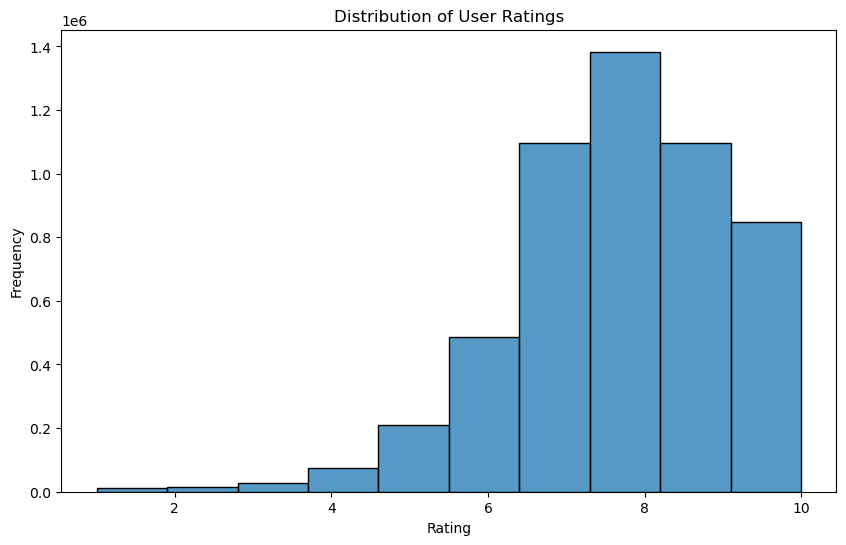

In [43]:
# Histogram of User Ratings Distibution
plt.figure(figsize = (10, 6))
sns.histplot(df['user_rating'], bins = 10)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### 2.2 Analyze Popular Animes
### Visualizing the most popular animes by the number of ratings.

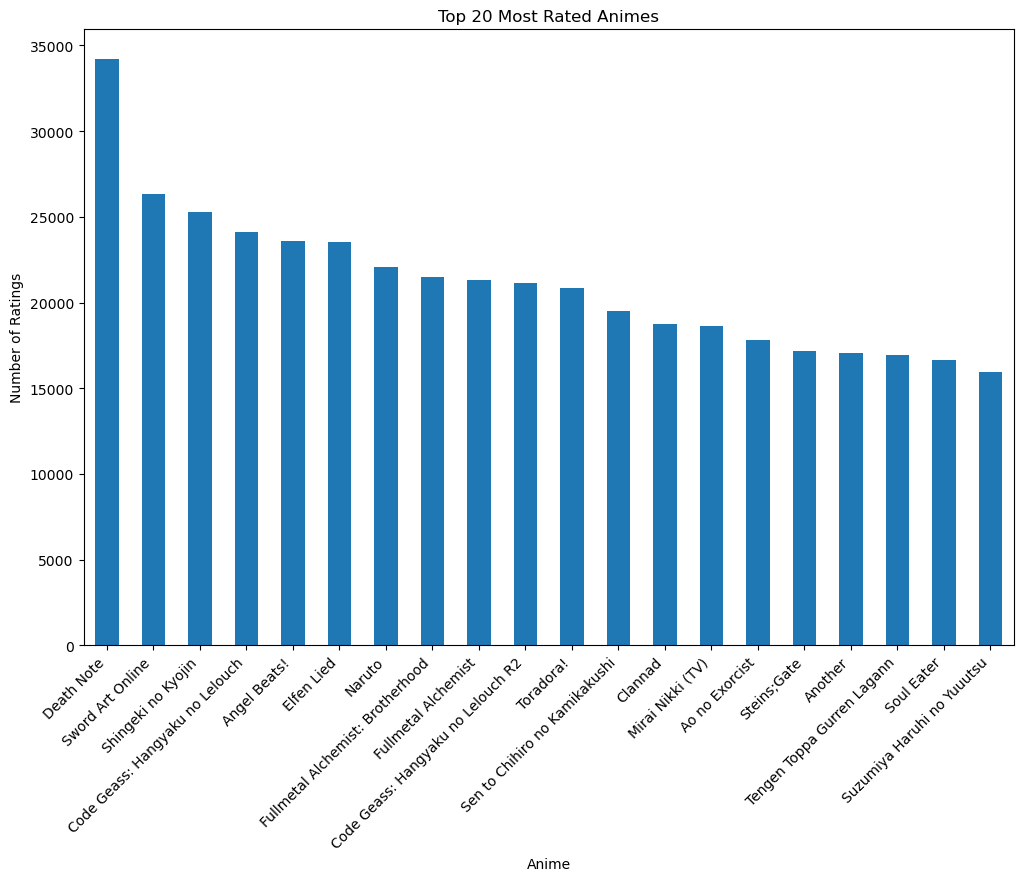

In [44]:
# Grouping by anime and count the number of ratings
anime_ratings = df.groupby('name')['user_rating'].count().sort_values(ascending = False).head(20)

# Bar plot for top 20 most rated animes
plt.figure(figsize = (12, 8))
anime_ratings.plot(kind = 'bar')
plt.title('Top 20 Most Rated Animes')
plt.xlabel('Anime')
plt.ylabel('Number of Ratings')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

### 2.3 Analyze User Rating Behavior
### Visualizing the distribution of the number of ratings per user.

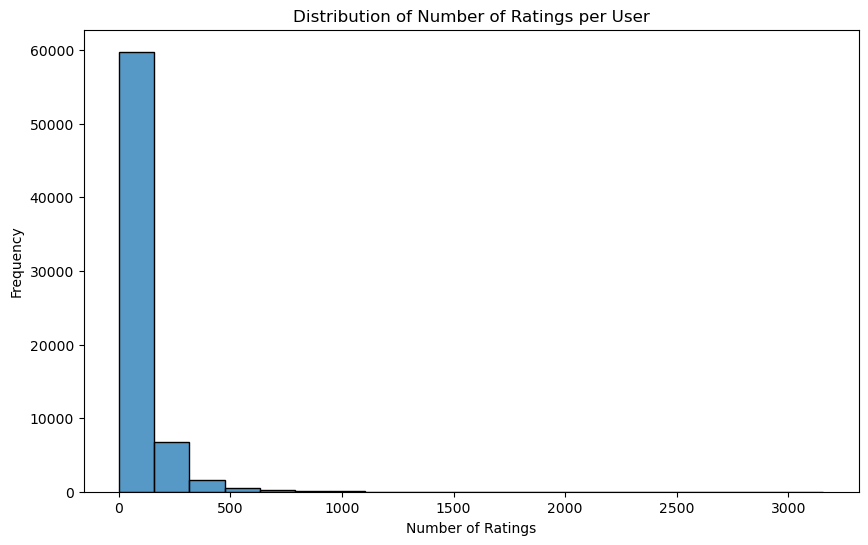

In [45]:
# Grouping by user and count the number of ratings
user_ratings = df.groupby('user_id')['user_rating'].count()

# Histogram of distribution of the number of ratings per user
plt.figure(figsize = (10, 6))
sns.histplot(user_ratings, bins = 20, kde = False)
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

## Step 3: Train-Test Split
### Split the data into training and test sets to evaluate the performance of the models correctly.

In [46]:
# Splitting the data into train and test sets
train_data, test_data = train_test_split(df, test_size = 0.2, random_state = 33)

# Inspecting the shapes of the train and test sets
print(f'Training set shape: {train_data.shape}')
print(f'Test set shape: {test_data.shape}')

Training set shape: (4197957, 53)
Test set shape: (1049490, 53)


## Step 4: Feature Reduction
### 1. Apply SVD to Reduce Dimensions and Extract Latent Factors
### 2. Determine Optimal Number of Latent Factors K

In [47]:
# Aggregating the ratings by average
aggregated_ratings = train_data.groupby(['user_id', 'anime_id'])['user_rating'].mean().reset_index()

# Creating the utility matrix for SVD
user_item_matrix = aggregated_ratings.pivot(index='user_id', columns='anime_id', values='user_rating').fillna(0)

# Converting the utility matrix to a sparse matrix
user_item_matrix_sparse = csr_matrix(user_item_matrix.values)

In [48]:
# Performing SVD
U, sigma, Vt = svds(user_item_matrix_sparse, k = 20)

# Converting sigma to a diagonal matrix
sigma = np.diag(sigma)

In [49]:
# Creating explained_variance() to calculate the explained variance
def explained_variance(sigma, k):
    return np.sum(sigma[:k] ** 2) / np.sum(sigma ** 2)

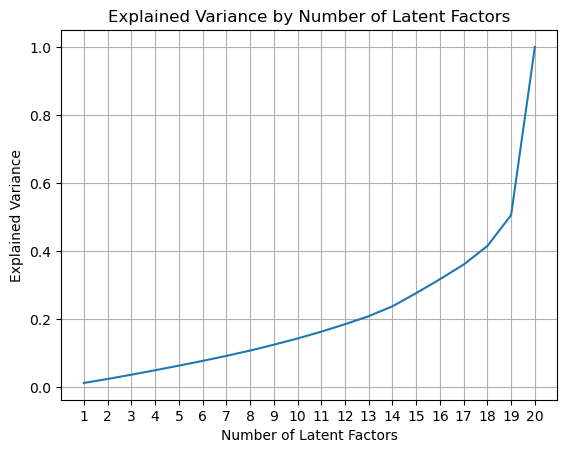

In [50]:
# Determining optimal number of latent factors
variances = [explained_variance(sigma, k) for k in range(1, len(sigma) + 1)]

plt.plot(range(1, len(sigma) + 1), variances)
plt.xlabel('Number of Latent Factors')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Number of Latent Factors')
plt.xticks(range(1, len(sigma) + 1, 1))
plt.grid(True)
plt.show()

# **NOTE: Based on the results from Clustering (Unsupervised) part of the project, we will be using K = 10 for the Item-Based Recommender System**

## Step 5: Use Cross Validation to validate choice of K

In [51]:
# Creating svd_predict() to compute SVD and predict ratings
def svd_predict(user_item_matrix, k):
    # Converting utility matrix to a sparse matrix
    user_item_matrix_sparse = csr_matrix(user_item_matrix.values)
    
    # Performing SVD on the sparse matrix
    U, sigma, Vt = svds(user_item_matrix_sparse, k = k)
    
    # Converting the sigma array to a diagonal matrix
    sigma = np.diag(sigma)
    
    # Reconstructing the matrix through multiplying U, sigma, and Vt
    predicted_ratings = np.dot(np.dot(U, sigma), Vt)
    
    # Returning the predicted ratings matrix
    return predicted_ratings

In [52]:
# Creating calculate_metrics() to calculate Root Mean Squared Error (rmse) and Mean Absolute Error (mae)
def calculate_metrics(predicted_ratings, true_ratings):
    # Calculating Mean Squared Error (mse) between the actual and predicted ratings
    mse = mean_squared_error(true_ratings, predicted_ratings)
    
    # Calculating mae between the true and predicted ratings
    mae = mean_absolute_error(true_ratings, predicted_ratings)
    
    # Returning the rmse and mae
    return np.sqrt(mse), mae

# NOTE: This block of code below is a for loop that performs 5-fold cross-validation on the entire 5.2M rows of data
# WARNING: This block has an extremely long run time. Therefore, comment out this block when testing the rest of the code

In [18]:
# For loop to perform 5-fold cross-validation with K = 10 from Clustering (Unsupervised) results of the project
kf = KFold(n_splits = 5, random_state = 33, shuffle = True)  # Initializing KFold with 5 splits
rmse_scores = []  # Initializing list to store RMSE scores for each fold
mae_scores = []  # Initializing list to store MAE scores for each fold

for train_index, test_index in kf.split(train_data):
    train_fold = train_data.iloc[train_index]  # Assigning the train index to the train fold
    test_fold = train_data.iloc[test_index]  # Assigning the test index to the test fold
    
    # Aggregating the ratings by averaging train data
    aggregated_train_ratings = train_fold.groupby(['user_id', 'anime_id'])['user_rating'].mean().reset_index()
    
    # Aggregating the ratings by averaging test data
    aggregated_val_ratings = test_fold.groupby(['user_id', 'anime_id'])['user_rating'].mean().reset_index()
    
    # Creating utility matrices for train and test sets
    user_item_matrix_train = aggregated_train_ratings.pivot(index = 'user_id', columns = 'anime_id', values = 'user_rating').fillna(0)
    user_item_matrix_val = aggregated_val_ratings.pivot(index = 'user_id', columns = 'anime_id', values = 'user_rating').fillna(0)
    
    # Using svd_predict() to predict ratings using SVD for the train utility matrix with K = 10 from Clustering (Unsupervised) results of the project
    predicted_ratings = svd_predict(user_item_matrix_train, k = 10)
    
    # Assigning the test ratings with the predicted ratings
    user_ids = user_item_matrix_val.index  # Retrieving user IDs from test set
    anime_ids = user_item_matrix_val.columns  # Retrieving anime IDs from test set
    
    # Extracting the actual and predicted ratings for the test set
    actual_ratings = []  # Initializing list to store actual ratings
    predicted_ratings_list = []  # Initializing list to store predicted ratings
    
    for user_id in user_ids:
        for anime_id in anime_ids:
            if user_id in user_item_matrix_train.index and anime_id in user_item_matrix_train.columns:
                # Appending actual ratings to the list
                actual_ratings.append(user_item_matrix_val.at[user_id, anime_id])  
                # Appending predicted ratings to the list
                predicted_ratings_list.append(predicted_ratings[user_item_matrix_train.index.get_loc(user_id), user_item_matrix_train.columns.get_loc(anime_id)])
    
    # Calculating Root Mean Squared Error (rmse) and Mean Average Error (mae) metrics for the current KFold
    rmse, mae = calculate_metrics(predicted_ratings_list, actual_ratings)
    rmse_scores.append(rmse)  # Append RMSE score to the list
    mae_scores.append(mae)  # Append MAE score to the list

# Calculating the average rmse and mae across all 5-folds
avg_rmse = np.mean(rmse_scores)
avg_mae = np.mean(mae_scores)

# Printing average for rmse and mae
print(f'Average RMSE: {avg_rmse}')
print(f'Average MAE: {avg_mae}')

Average RMSE: 0.4599025924107557
Average MAE: 0.10549708395965718


## Step 6: Create functions
### apply_svd_and_reconstruct(): 
### - Process utility and sparce matrices with K = 10 through Singular Value Decomposition (SVD) to create a reconstructed matrix
### fit_knn(): 
### - Fit a KNN model on the reconstructed matrix with Cosine distance, and Brute algorithm
### extract_genres(): 
### - Extract the genres for the specific anime from the one hot encoding
### generate_recommendations(): 
### - Generate 10 Item-Based Recommendations through the fitted KNN model, and reconstructed matrix. This Function finds similar animes based on the nearest neighbors through the shortest similarity distances.

In [53]:
# Creating apply_svd_and_reconstruct() to apply SVD and reconstruct the matrix with K = 10 from Clustering (Unsupervised) results of the project
def apply_svd_and_reconstruct(data_matrix, utility_matrix, k = 10):
    # Performing SVD on the matrix
    U, sigma, Vt = svds(data_matrix, k = k)
    
    # Converting the sigma array to a diagonal matrix
    sigma = np.diag(sigma)
    
    # Reconstructing the matrix by multiplying U, sigma, and Vt
    reconstructed_matrix = np.dot(np.dot(U, sigma), Vt)

    # Preserving the actual index and columns of the utility matrix
    # Converting the reconstructed_matrix to a DataFrame and returning it
    return pd.DataFrame(reconstructed_matrix, index = utility_matrix.index, columns = utility_matrix.columns)


In [54]:
# Creating fit_knn() to fit NearestNeighbors model with the 'brute' algorithm
def fit_knn(data_matrix, algorithm = 'brute'):
    
    # Initializing the KNN model with 'cosine' distance and 'brute'
    model_knn = NearestNeighbors(metric = 'cosine', algorithm = algorithm)
    
    # Fitting the KNN model on the data_matrix
    model_knn.fit(data_matrix)
    
    # Returning the fitted KNN model
    return model_knn

In [55]:
# Creating extract_genres() to extract genres from one hot encoded columns post pre-processing
def extract_genres(anime_name):
    
    # List that stores the genre(s) over all columns in the DataFrame that have 'genre_'
    genres = [
        # Removing prefix 'genre_' from the column name
        col.replace('genre_', '')  # Removing prefix 'genre_' from the column name
        for col in df.columns
        if col.startswith('genre_')  # Check if the column name starts with 'genre_'
        and df.loc[df['name'] == anime_name, col].values[0] == 1  # Check if the anime has this genre (value is 1)
    ]
    
    # Joining the genres with a comma and returning it a string
    return ', '.join(genres)


In [56]:
# Creating generate_recommendations() to generate recommendations based on anime name
def generate_recommendations(model_knn, utility_matrix, anime_name, num_recommendations = 11):
    
    # Checking if the given anime name is in the utility matrix index
    if anime_name not in utility_matrix.index:
        raise ValueError(f"Anime '{anime_name}' not found in the dataset.")
    
    # Finding the index of the given anime name in the utility matrix
    query_index = utility_matrix.index.get_loc(anime_name)
    
    # Finding similar animes (nearest neighbors) using the KNN model
    distances, indices = model_knn.kneighbors(utility_matrix.iloc[query_index, :].values.reshape(1, -1), n_neighbors = num_recommendations)
    
    # Initializing lists to store the recommendation details to be saved in the resulting DataFrame
    no = [0]  # Rank of the anime initialized to 0 to represent the query anime 
    name = [anime_name]  # Name of the anime
    distance = [0]  # Similarity distance measure initialized to 0 to represent the query anime
    rating = [df[df['name'] == anime_name]['user_rating'].mean()] # Average rating of the anime
    genre = [extract_genres(anime_name)]  # Genres of the anime extracted using extract_genres()
    
    # For loop to iterate over the recommended animes, excluding the query anime [0]
    for i in range(1, len(distances.flatten())):
        # Finding the recommended anime name
        recommended_anime_name = utility_matrix.index[indices.flatten()[i]]  
        no.append(i)  # Appending the rank
        name.append(recommended_anime_name)  # Appending the recommended anime name
        distance.append(distances.flatten()[i])  # Appending the similarity distance measure
        
        # Appending the average rating of the recommended anime
        rating_value = df[df['name'] == recommended_anime_name]['user_rating'].mean()
        rating.append(rating_value)
        
        # Appending the genres of the extract_genres()
        genre_value = extract_genres(recommended_anime_name)
        genre.append(genre_value)
    
    # Creating a dictionary to store the details of the recommended anime 
    recommendation_dict = {'No': no, 
                           'Anime Name': name, 
                           'Rating': rating, 
                           'Similarity Distance': distance,
                           'Genre': genre}
    
    # Converting the dictionary to a DataFrame and setting the index to 'No'
    recommendation = pd.DataFrame(data = recommendation_dict)
    recommendation.set_index('No', inplace = True)
    
    # Returning the anime recommendation DataFrame for the user to see
    return recommendation

## Step 7: Create the Utility and Sparse matrices from the full dataset, Apply SVD with K = 10 to reconstruct the utility matrix, and fit NearestNeighbors model with the Brute algorithm

In [57]:
# Creating utility matrix for full dataset through pivot table from the dataframe 
# with anime names as rows, user IDs as columns, and user ratings as values
# Fill any missing values with 0
utility_matrix_full = df.pivot_table(index = 'name', columns = 'user_id', values = 'user_rating').fillna(0)


# Converting the utility matrix to a sparse matrix format
data_matrix_full = csr_matrix(utility_matrix_full.values)

In [58]:
# Using apply_svd_and_reconstruct() to apply SVD and reconstruct the sparse and utility matrix
reconstructed_matrix_df_full = apply_svd_and_reconstruct(data_matrix_full, utility_matrix_full, k = 10)

# Fitting KNN model for the reconstructed matrix using fit_knn()
model_knn_reconstructed_full = fit_knn(reconstructed_matrix_df_full, algorithm = 'brute')

## Step 8: Generate 10 recommendations for each anime in the anime names list below, against the full dataset.

In [59]:
# Anime names to find recommendations for
anime_names = ['Fullmetal Alchemist', 'Naruto', 'Nana']

In [60]:
df.shape

(5247447, 53)

In [61]:
# For loop to generate and display recommendations using the reconstructed matrix for both anime names
for anime_name in anime_names:
    # Generating recommendations for the given anime name using the KNN model and reconstructed matrix
    recommendations_reconstructed_full = generate_recommendations(model_knn_reconstructed_full, reconstructed_matrix_df_full, anime_name)
    
    # Printing anime name for which recommendations are being generated for
    print(f"\nRecommendations using full data matrix for '{anime_name}':")
    
    # Displaying the DataFrames in the for loop
    display(recommendations_reconstructed_full)


Recommendations using full data matrix for 'Fullmetal Alchemist':


,Anime Name,Rating,Similarity Distance,Genre
No,,,,
0,Fullmetal Alchemist,8.453356,0.000000,"Action, Adventure, Comedy, Drama, Fantasy, Magic, Military, Shounen"
1,Hellsing,7.752803,0.051392,"Action, Horror, Seinen, Supernatural, Vampire"
2,Fullmetal Alchemist: The Conqueror of Shamballa,7.904338,0.064602,"Comedy, Drama, Fantasy, Historical, Military, Shounen"
3,Elfen Lied,8.064434,0.070644,"Action, Drama, Horror, Psychological, Romance, Seinen, Supernatural"
4,Death Note,8.834629,0.070797,"Mystery, Police, Psychological, Supernatural, Thriller"
5,Soul Eater,8.243475,0.074416,"Action, Adventure, Comedy, Fantasy, Shounen, Supernatural"
6,Claymore,8.043523,0.079723,"Action, Adventure, Demons, Fantasy, Shounen, Super Power, Supernatural"
7,Final Fantasy VII: Advent Children Complete,8.316318,0.092284,"Action, Fantasy, Super Power"
8,Naruto,7.893888,0.093904,"Action, Comedy, Martial Arts, Shounen, Super Power"



Recommendations using full data matrix for 'Naruto':


,Anime Name,Rating,Similarity Distance,Genre
No,,,,
0,Naruto,7.893888,0.000000,"Action, Comedy, Martial Arts, Shounen, Super Power"
1,Shaman King,7.882734,0.069467,"Action, Adventure, Comedy, Drama, Shounen, Supernatural"
2,Bleach,8.238242,0.079176,"Action, Comedy, Shounen, Super Power, Supernatural"
3,Soul Eater,8.243475,0.083145,"Action, Adventure, Comedy, Fantasy, Shounen, Supernatural"
4,Death Note,8.834629,0.088948,"Mystery, Police, Psychological, Supernatural, Thriller"
5,Fullmetal Alchemist,8.453356,0.093904,"Action, Adventure, Comedy, Drama, Fantasy, Magic, Military, Shounen"
6,Fullmetal Alchemist: Brotherhood,9.322741,0.103190,"Action, Adventure, Drama, Fantasy, Magic, Military, Shounen"
7,Dragon Ball Z,8.314967,0.104964,"Action, Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power"
8,Dragon Ball,8.169716,0.106381,"Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power"



Recommendations using full data matrix for 'Nana':


,Anime Name,Rating,Similarity Distance,Genre
No,,,,
0,Nana,8.738170,0.000000,"Comedy, Drama, Music, Romance, Shoujo, Slice of Life"
1,Paradise Kiss,8.117012,0.032170,"Comedy, Drama, Josei, Romance, Slice of Life"
2,LovelyComplex,8.382853,0.056143,"Comedy, Romance, Shoujo"
3,Skip Beat!,8.422645,0.060019,"Comedy, Drama, Romance, Shoujo"
4,Yamato Nadeshiko Shichihenge,8.080394,0.065784,"Comedy, Shoujo"
5,Bokura ga Ita,7.782975,0.070047,"Drama, Romance, Shoujo, Slice of Life"
6,Romeo x Juliet,8.066949,0.081968,"Drama, Fantasy, Historical, Romance"
7,Fruits Basket,7.966307,0.088362,"Comedy, Drama, Fantasy, Romance, Shoujo, Slice of Life"
8,Peach Girl,7.363292,0.095755,"Drama, Romance, Shoujo, Slice of Life"


## Step 9: Explore a proper threshold

In [62]:
# Exploring data to identify a proper threshold

# Calculating the number of ratings per user_id
user_rating_counts = df.groupby('user_id').size()

# Finding the number of of users who have rated only once
num_users_rated_once = user_rating_counts[user_rating_counts == 1].count()
print(f'Number of users who have rated only once: {num_users_rated_once}')

Number of users who have rated only once: 3395


In [63]:
# Number of users with at least min_ratings
min_ratings = 40

In [64]:
# Finding number of users with at least min_ratings
num_users_min_ratings = user_rating_counts[user_rating_counts >= min_ratings].count()
print(f'Number of users with at least {min_ratings} ratings: {num_users_min_ratings}')

Number of users with at least 40 ratings: 34064


## Step 10: Filter the dataset based on the minimum 40 ratings per user threshold

In [65]:
# Filter the dataset and try Item-Based Collaborative Filtering again

# Filtering users with at least min_ratings
# Counting the number of ratings for each user and store it in selected_users
selected_users = df['user_id'].value_counts()


# Filtering the DataFrame to include only users who have at least min_ratings
# The 'isin' method checks if the user_id is in the list of users with at least min_ratings
df_filtered = df[df['user_id'].isin(selected_users[selected_users >= min_ratings].index)]

In [66]:
df_filtered.shape

(4744622, 53)

## Step 11: Generate 10 recommendations for each anime in the anime list below, based on the threshold subset

In [67]:
# Creating utility matrix for filtered dataset through pivot table from the dataframe 
# with anime names as rows, user IDs as columns, and user ratings as values
# Fill any missing values with 0
utility_matrix_filtered = df_filtered.pivot_table(index = 'name', columns = 'user_id', values = 'user_rating').fillna(0)

# Converting the filtered utility matrix to a sparse matrix format
data_matrix_filtered = csr_matrix(utility_matrix_filtered.values)

In [68]:
# Using apply_svd_and_reconstruct() to apply SVD and reconstruct the filtered sparse and utility matrix
reconstructed_matrix_df_filtered = apply_svd_and_reconstruct(data_matrix_filtered, utility_matrix_filtered, k = 10)


# Fitting KNN model for the filtered reconstructed matrix using fit_knn()
model_knn_filtered_reconstructed = fit_knn(reconstructed_matrix_df_filtered, algorithm = 'brute')

In [69]:
# For loop to generate and display recommendations using the filtered matrix for both anime names
for anime_name in anime_names:
    # Generating recommendations for the given anime name using the KNN model and reconstructed matrix
    recommendations_filtered_reconstructed = generate_recommendations(model_knn_filtered_reconstructed, reconstructed_matrix_df_filtered, anime_name)
    
    # Printing anime name for which recommendations are being generated for
    print(f"\nRecommendations using filtered data matrix for '{anime_name}':")
    
    # Displaying the DataFrames in the for loop
    display(recommendations_filtered_reconstructed)


Recommendations using filtered data matrix for 'Fullmetal Alchemist':


,Anime Name,Rating,Similarity Distance,Genre
No,,,,
0,Fullmetal Alchemist,8.453356,0.000000,"Action, Adventure, Comedy, Drama, Fantasy, Magic, Military, Shounen"
1,Hellsing,7.752803,0.042946,"Action, Horror, Seinen, Supernatural, Vampire"
2,Elfen Lied,8.064434,0.054593,"Action, Drama, Horror, Psychological, Romance, Seinen, Supernatural"
3,Fullmetal Alchemist: The Conqueror of Shamballa,7.904338,0.056651,"Comedy, Drama, Fantasy, Historical, Military, Shounen"
4,Death Note,8.834629,0.056663,"Mystery, Police, Psychological, Supernatural, Thriller"
5,Soul Eater,8.243475,0.060913,"Action, Adventure, Comedy, Fantasy, Shounen, Supernatural"
6,Claymore,8.043523,0.071061,"Action, Adventure, Demons, Fantasy, Shounen, Super Power, Supernatural"
7,Code Geass: Hangyaku no Lelouch,8.927796,0.074029,"Action, Mecha, Military, School, Sci-Fi, Super Power"
8,Final Fantasy VII: Advent Children Complete,8.316318,0.076424,"Action, Fantasy, Super Power"



Recommendations using filtered data matrix for 'Naruto':


,Anime Name,Rating,Similarity Distance,Genre
No,,,,
0,Naruto,7.893888,0.000000,"Action, Comedy, Martial Arts, Shounen, Super Power"
1,Shaman King,7.882734,0.056775,"Action, Adventure, Comedy, Drama, Shounen, Supernatural"
2,Soul Eater,8.243475,0.065563,"Action, Adventure, Comedy, Fantasy, Shounen, Supernatural"
3,Bleach,8.238242,0.070839,"Action, Comedy, Shounen, Super Power, Supernatural"
4,Death Note,8.834629,0.071705,"Mystery, Police, Psychological, Supernatural, Thriller"
5,Fullmetal Alchemist: Brotherhood,9.322741,0.086241,"Action, Adventure, Drama, Fantasy, Magic, Military, Shounen"
6,Fullmetal Alchemist,8.453356,0.086304,"Action, Adventure, Comedy, Drama, Fantasy, Magic, Military, Shounen"
7,Dragon Ball Z,8.314967,0.095760,"Action, Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power"
8,Dragon Ball,8.169716,0.095837,"Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power"



Recommendations using filtered data matrix for 'Nana':


,Anime Name,Rating,Similarity Distance,Genre
No,,,,
0,Nana,8.738170,0.000000,"Comedy, Drama, Music, Romance, Shoujo, Slice of Life"
1,Paradise Kiss,8.117012,0.035298,"Comedy, Drama, Josei, Romance, Slice of Life"
2,LovelyComplex,8.382853,0.054497,"Comedy, Romance, Shoujo"
3,Skip Beat!,8.422645,0.061538,"Comedy, Drama, Romance, Shoujo"
4,Bokura ga Ita,7.782975,0.069370,"Drama, Romance, Shoujo, Slice of Life"
5,Yamato Nadeshiko Shichihenge,8.080394,0.070246,"Comedy, Shoujo"
6,Romeo x Juliet,8.066949,0.086771,"Drama, Fantasy, Historical, Romance"
7,Fruits Basket,7.966307,0.088003,"Comedy, Drama, Fantasy, Romance, Shoujo, Slice of Life"
8,Peach Girl,7.363292,0.101692,"Drama, Romance, Shoujo, Slice of Life"


## Step 12: Compare performances of similarity distance measurements between the full dataset and the filtered threshold subset